importing Jupyter notebook from environment.ipynb
importing Jupyter notebook from utils.ipynb


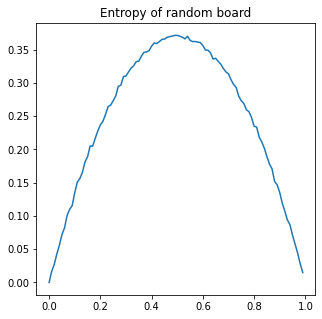

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

import import_ipynb
from environment import GameOfLifeEnv
from utils import *

## Plot of the average density of a naturally evolving grid vs with a random agent

KeyboardInterrupt: 

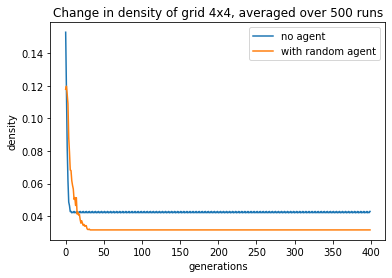

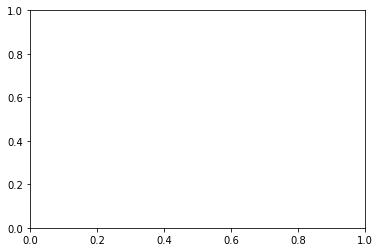

In [5]:
N_games = 500
for size in [4, 7, 10]:    
    env = GameOfLifeEnv(grid_size=size, density=0.6)
    fig, ax = plt.subplots()
    all_rewards = np.zeros(400)
    all_rewards_agent = np.zeros(400)

    for i in range(N_games):
        state = env.reset()
        rewards = np.zeros((400))
        done = False
        for j in range(len(rewards)):
            if not done:
                state, r, done = env.step(None)
            rewards[j] = r
        all_rewards = all_rewards + rewards
    avg = all_rewards / N_games

    for i in range(N_games):
        state = env.reset()
        rewards = np.zeros((400))
        done = False
        for j in range(len(rewards)):
            if not done:
                a = take_random_action(state)
                state, r, done = env.step(a)
            rewards[j] = r
        all_rewards_agent = all_rewards_agent + rewards
    avg_agent = all_rewards_agent / N_games

    ax.plot(avg, label='no agent')
    ax.plot(avg_agent, label='with random agent')
    ax.set_title(f'Change in density of grid {env.grid_size}x{env.grid_size}, averaged over {N_games} runs')
    ax.set_xlabel('generations')
    ax.set_ylabel('density')
    plt.legend()
plt.show()

## Conclusions
In bigger grids we observe the following tendencies:
- Greater time for reaching stagnation with the agent
- The average reward at the last step of the game is lower in the case with the random agent. That's because the agent destroys stable structures; games with agent finish with dead cells almost all of the time.

## Plot of the normalized entropy with and without an agent

In [ ]:
%matplotlib notebook

env = GameOfLifeEnv(grid_size=32, density=0.6, seed=53)
N_games = 1
fig, ax = plt.subplots()
all_norm_entropies = np.zeros(400)
all_norm_entropies_agent = np.zeros(400)

for i in range(N_games):
    state = env.reset()
    print(state)
    entropies = np.zeros(400)
    done = False
    for j in range(len(entropies)):
#         print('gen = ', j, done)
        if not done:
            state, r, done = env.step(None)
        entropies[j] = get_normalized_entropy(state, subregion_size=2)
    all_norm_entropies = all_norm_entropies + entropies
avg = all_norm_entropies / N_games


print("tuka pochva s agent")
for i in range(N_games):
    state = env.reset()
    print(state)
    entropies = np.zeros(400)
    done = False
    for j in range(len(entropies)):
        if not done:
            a = take_random_action(state)
            a = None
            state, r, done = env.step(a)
        entropies[j] = get_normalized_entropy(state, subregion_size=4)
    all_norm_entropies_agent = all_norm_entropies_agent + entropies
avg_agent = all_norm_entropies_agent / N_games

ax.set_title()
ax.plot(avg)
ax.plot(avg_agent)

In [11]:
asdf = [1,2,34,5,67,87]

193 ns ± 7.17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
